---
**Chapter 07**
# **Working with Keras: A deep dive**
---

In [1]:
# System Libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

# User Libraries
from modules import Chapter_01
from modules import Common

# Reload Libraries
importlib.reload(Chapter_01)
importlib.reload(Common)

<module 'modules.Common' from '/Users/siddiqui/Projects/concepts/concepts-ai/notebooks/../modules/Common.py'>

---
# **Graphviz**
---

| Step |Detail |
| --- | ---|
| Step 01 | pip install pydot |
| Step 02 (Linux) | sudo apt install graphviz |
| Step 02 (Mac)   | brew install graphviz |
| Step 03 (Linux) | pip install pygraphviz |
| Step 03 (Mac) | [pygraphviz on M2 Mac](https://github.com/pygraphviz/pygraphviz/issues/398#issuecomment-1516213484) |


---
# **Model Pattern — Keras.Sequential**
---

### <ins />**1. Single Input/Output**

**Using build**

In [2]:
model = keras.Sequential(name="example_sequential_api_1")
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid))
model.build(input_shape=(None, 3))  # N batches, 3 features
model.summary()

Model: "example_sequential_api_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Using Input**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature (Dense)             (None, 64)                256       
                                                                 
 O_Output (Dense)            (None, 1)                 65        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


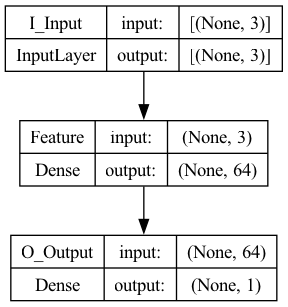

In [3]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=((3,)), name="I_Input"))
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature"))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid, name="O_Output"))
model.summary()
keras.utils.plot_model(model, "../resources/images/tmp/single_io_model_sequential.png", show_shapes=True)

**Difference between layer and model**

Model has fit / evaluate / predict / save methods

### <ins />**2. Multi Input/Output**

> Sequential API works only with single input/output

---
# **Model Pattern — Keras.Model**
---

### <ins />**1. Single Input/Output**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 I_Input (InputLayer)        [(None, 3)]               0         
                                                                 
 Feature (Dense)             (None, 64)                256       
                                                                 
 O_Output (Dense)            (None, 1)                 65        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


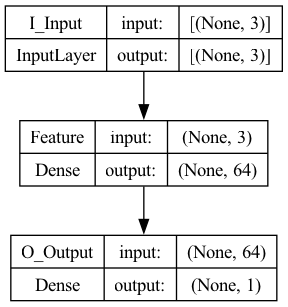

In [4]:
inputs = keras.layers.Input(shape=((3,)), name="I_Input")
features = keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature")(inputs)
outputs = keras.layers.Dense(units=1, activation=tf.nn.sigmoid, name="O_Output")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
keras.utils.plot_model(model, "../resources/images/tmp/single_io_model_functional.png", show_shapes=True)

### <ins />**2. Dataset**

**Description:**
- Customer ticket management system

**Input:**
- Title of ticket
- Text of ticket
- Tag of ticket

**Output:**
- Priority of ticket
- Department of ticket
- Difficulty of ticket

In [5]:
# ------------------------------
# Shapes
# ------------------------------
num_samples = 1280
num_words = 1000
num_tags = 10
num_priorities = 1
num_departments = 4
num_difficulties = 3
# ------------------------------
# Inputs
# ------------------------------
I_title = np.random.randint(low=0, high=2, size=(num_samples, num_words))
I_text = np.random.randint(low=0, high=2, size=(num_samples, num_words))
I_tag = np.random.randint(low=0, high=2, size=(num_samples, num_tags))
# ------------------------------
# Outputs
# ------------------------------
O_priority = np.random.random(size=(num_samples, num_priorities))
O_department = np.random.randint(low=0, high=2, size=(num_samples, num_departments))
O_difficulty = np.random.randint(low=0, high=2, size=(num_samples, num_difficulties))

### <ins />**3. Model Layers**

In [6]:
# ------------------------------
# Inputs
# ------------------------------
L_title = keras.layers.Input(shape=(num_words,), name="I_title")
L_text = keras.layers.Input(shape=(num_words,), name="I_text")
L_tag = keras.layers.Input(shape=(num_tags,), name="I_tag")
inputs = keras.layers.Concatenate(name="Mixing")([L_title, L_text, L_tag])
# ------------------------------
# Features
# ------------------------------
features = keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature")(inputs)
# ------------------------------
# Outputs
# ------------------------------
L_priority = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid, name="O_priority")(features)
L_department = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax, name="O_department")(features)

### <ins />**4. Model Creation**

In [7]:
model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department])

### <ins />**5. Model Summary**

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 I_title (InputLayer)        [(None, 1000)]               0         []                            
                                                                                                  
 I_text (InputLayer)         [(None, 1000)]               0         []                            
                                                                                                  
 I_tag (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 Mixing (Concatenate)        (None, 2010)                 0         ['I_title[0][0]',             
                                                                     'I_text[0][0]',        

### <ins />**7. Model Graph**

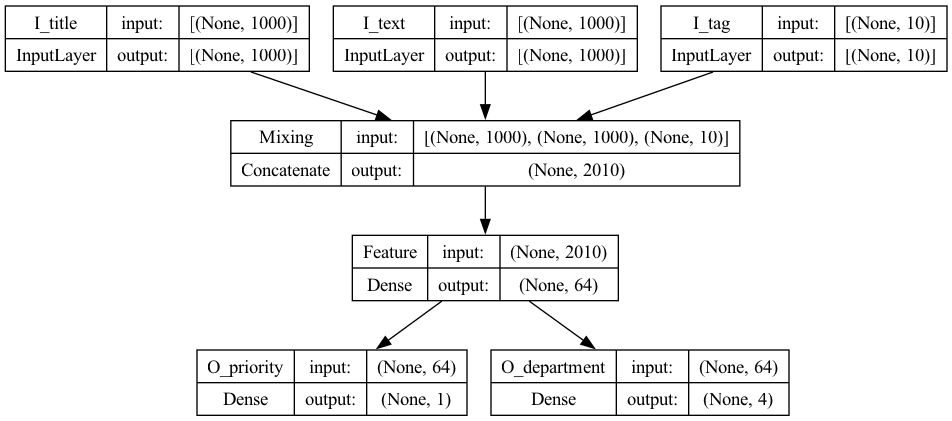

In [9]:
keras.utils.plot_model(model, "../resources/images/tmp/multi_io_model_functional.png", show_shapes=True)

### <ins />**8. Model Feature Extraction**

**Problem:**
- Add a new output in the model
- Do not change original model

**Solution:**
- Extract features from existing model
- Create new model using extracted features

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 I_title (InputLayer)        [(None, 1000)]               0         []                            
                                                                                                  
 I_text (InputLayer)         [(None, 1000)]               0         []                            
                                                                                                  
 I_tag (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 Mixing (Concatenate)        (None, 2010)                 0         ['I_title[0][0]',             
                                                                     'I_text[0][0]',        

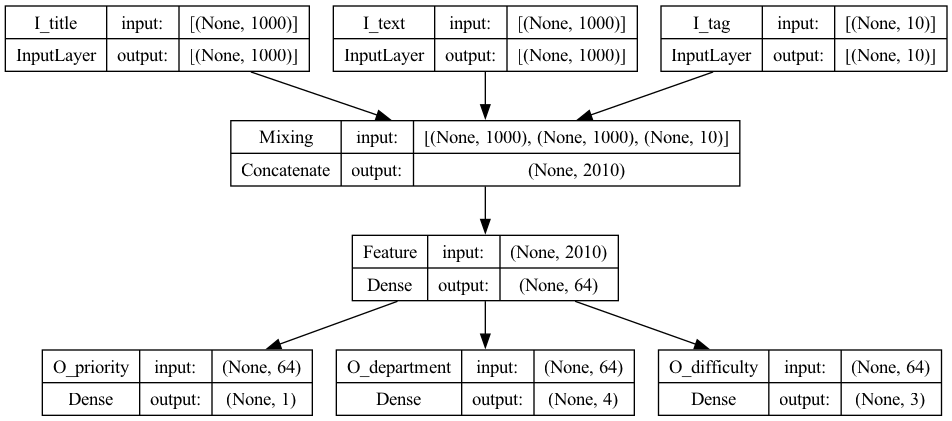

In [10]:
# ------------------------------
# Features
# ------------------------------
features = model.layers[4].output
L_difficulty = keras.layers.Dense(units=num_difficulties, activation=tf.nn.softmax, name="O_difficulty")(features)
full_model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department, L_difficulty])
full_model.summary()
keras.utils.plot_model(full_model, "../resources/images/tmp/multi_io_model_functional.png", show_shapes=True)

### <ins />**9. Model Configuration**

In [11]:
# ------------------------------
# Array notation can also be used
# ------------------------------
full_model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss={
        "O_priority": keras.losses.MeanSquaredError(),
        "O_department": keras.losses.CategoricalCrossentropy(),
        "O_difficulty": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "O_priority": keras.metrics.MeanAbsoluteError(),
        "O_department": keras.metrics.CategoricalAccuracy(),
        "O_difficulty": keras.metrics.CategoricalAccuracy(),
    },
)

### <ins />**10. Model Training**

In [12]:
epochs = 1
history = full_model.fit(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    y={
        "O_priority": O_priority,
        "O_department": O_department,
        "O_difficulty": O_difficulty,
    },
    epochs=epochs,
    verbose=False,
)

### <ins />**11. Model Evaluation**

In [13]:
full_model.evaluate(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    y={
        "O_priority": O_priority,
        "O_department": O_department,
        "O_difficulty": O_difficulty,
    },
    verbose=False,
)

[4.993653774261475,
 0.12337692826986313,
 3.0772480964660645,
 1.7930288314819336,
 0.2891668677330017,
 0.453125,
 0.23359374701976776]

### <ins />**12. Model Prediction**

In [14]:
P_priority, P_department, P_difficulty = full_model.predict(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    verbose=False,
)

---
# **Model Pattern — Subclass Keras.Model**
---

### <ins />**1. Model Subclass**

In [15]:
class MyClass(keras.Model):
    # ------------------------------
    # Define Layers
    # ------------------------------
    def __init__(self):
        super().__init__()
        self.concat_layer = keras.layers.Concatenate()
        self.mixing_layer = keras.layers.Dense(units=64, activation=tf.nn.relu)
        self.priority_scorer = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid)
        self.department_classifier = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax)

    # ------------------------------
    # Define Forward Pass (Prediction)
    # ------------------------------
    def call(self, inputs):
        title, text, tag = inputs
        features = self.concat_layer(inputs)
        features = self.mixing_layer(features)
        P_priority = self.priority_scorer(features)
        P_department = self.department_classifier(features)
        return P_priority, P_department

### <ins />**2. Model Creation**

In [16]:
subclass_model = MyClass()

### <ins />**3. Model Configuration**

In [17]:
subclass_model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
    metrics=[keras.metrics.MeanAbsoluteError(), keras.metrics.CategoricalAccuracy()],
)

### <ins />**4. Model Training**

In [18]:
epochs = 1
history = subclass_model.fit(
    x=[I_title, I_text, I_tag],
    y=[O_priority, O_department],
    epochs=epochs,
    verbose=False,
)

### <ins />**5. Model Evaluation**

In [19]:
subclass_model.evaluate(
    x=[I_title, I_text, I_tag],
    y=[O_priority, O_department],
    verbose=False,
)

[3.6442763805389404,
 0.3286646604537964,
 3.3156116008758545,
 0.49601268768310547,
 1.0,
 0.4835403859615326,
 0.14218750596046448]

### <ins />**6. Model Prediction**

In [20]:
subclass_model.predict([I_title, I_text, I_tag])

40/40 [==============================] - 0s 470us/step


(array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[0.06019837, 0.2143519 , 0.1735795 , 0.5518703 ],
        [0.02822836, 0.24383727, 0.2294417 , 0.4984927 ],
        [0.02974281, 0.30540168, 0.3741232 , 0.29073235],
        ...,
        [0.07165478, 0.21386619, 0.39956072, 0.31491834],
        [0.07285814, 0.51644284, 0.33152288, 0.07917611],
        [0.04597529, 0.35441288, 0.380363  , 0.21924886]], dtype=float32))

### <ins />**7. Model Summary**

In [21]:
subclass_model.summary()

Model: "my_class"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate (Concatenate)   multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  128704    
                                                                 
 dense_3 (Dense)             multiple                  65        
                                                                 
 dense_4 (Dense)             multiple                  260       
                                                                 
Total params: 129029 (504.02 KB)
Trainable params: 129029 (504.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <ins />**8. Model Graph**

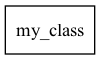

In [22]:
keras.utils.plot_model(subclass_model, "../resources/images/tmp/multi_io_model_subclass.png", show_shapes=True)

### <ins />**9. Disadvantages**

- Summary does not work completely (layers added are not shown)
- Graph (plot_model) does not work
- More boilerplate code required
- Forward pass is a black box
- Bigger error surface area
- More debugging required


---
# **Mixing Module Patterns**
---

### <ins />**1. Functional model including Subclass model**

### <ins />**2. Subclass model including Functional model**

### <ins />**3. Conclusion**

- Subclass layers with functional model provides development flexibility and simplicity

---
# **Builtin fit, evaluation, prediction methods**
---

### <ins />**1. Mnist using Functional model**

In [23]:
(x_train, y_train), (x_test, y_test) = Chapter_01.prepare()
# ---------------------------------
# Forward Propagation Configuration
# ---------------------------------
inputs = keras.layers.Input(shape=(28 * 28))
features = keras.layers.Dense(units=256, activation=tf.nn.relu)(inputs)
features = keras.layers.Dropout(0.01)(features)
outputs = keras.layers.Dense(units=10, activation=tf.nn.softmax)(features)
model = keras.Model(inputs=inputs, outputs=outputs)
# ---------------------------------
# Backward Propagation Configuration
# ---------------------------------
model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
history = Chapter_01.train(x=x_train, y=y_train, epoch=2, model=model)
Chapter_01.evaluate(x=x_test, y=y_test, model=model, silent=True)
Chapter_01.predict(x=x_test, y=y_test, model=model, silent=True)

### <ins />**2. Custom Metrics**

- Metrics measure the performance of model on train dataset versus test dataset
- keras.metrics **does not** update its variables in backpropagation
- The following are the methods for custom metrics:
  - update_state()
  - results()
  - reset_state()
- Note: keras.layers update its variables in backpropagation unlike keras.metrics

In [24]:
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        # Metric Constructor
        super().__init__(name=name, **kwargs)
        # Create Weights
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.num_samples = self.add_weight(name="num_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # y_true and y_pred are labels of a batch
        # y_true must be a probability distribution
        # Number of labels in the batch
        num_labels = tf.shape(y_pred)[1]
        y_true = tf.one_hot(y_true, depth=num_labels)
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        # Total number of samples in a batch
        num_samples = tf.shape(y_pred)[0]
        # Update weights
        self.mse_sum.assign_add(mse)
        self.num_samples.assign_add(num_samples)

    def result(self):
        # Root mean square averaged across all samples in a batch
        return tf.sqrt(self.mse_sum / tf.cast(self.num_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.0)
        self.num_samples.assign(0)

In [25]:
model = Chapter_01.get_function_model(with_compile=False)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(), RootMeanSquaredError()],
    optimizer=keras.optimizers.legacy.RMSprop(),
)
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    epochs=5,
    batch_size=5000,
    verbose=False,
)
test_loss, test_acc, test_rmse = model.evaluate(x=x_test, y=y_test, verbose=False)
print("History: ", history.history.keys())
print("Root Mean Squared Error: ", test_rmse)
print("Crossentropy: ", test_loss)
print("Accuracy: ", test_acc)

History:  dict_keys(['loss', 'sparse_categorical_accuracy', 'rmse', 'val_loss', 'val_sparse_categorical_accuracy', 'val_rmse'])
Root Mean Squared Error:  0.06947536021471024
Crossentropy:  0.3208736479282379
Accuracy:  0.911300003528595


### <ins />**3. Builtin Callbacks**

**Common Callbacks**
  1. LearningRateScheduler
  2. ReduceLROnPlateau
  3. ModelCheckpoint
  4. EarlyStopping
  5. CSVLogger

**EarlyStopping + ModelCheckpoint**

In [26]:
callbacks = [
    # Stop training once metric stops improving for n epochs
    keras.callbacks.EarlyStopping(
        monitor="val_sparse_categorical_accuracy",
        patience=2,  # how many epoch
    ),
    # Save model when metric improves
    keras.callbacks.ModelCheckpoint(
        filepath="../resources/models/tmp/checkpoint.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
]

Metrics: 
loss, sparse_categorical_accuracy, val_loss, val_sparse_categorical_accuracy, 


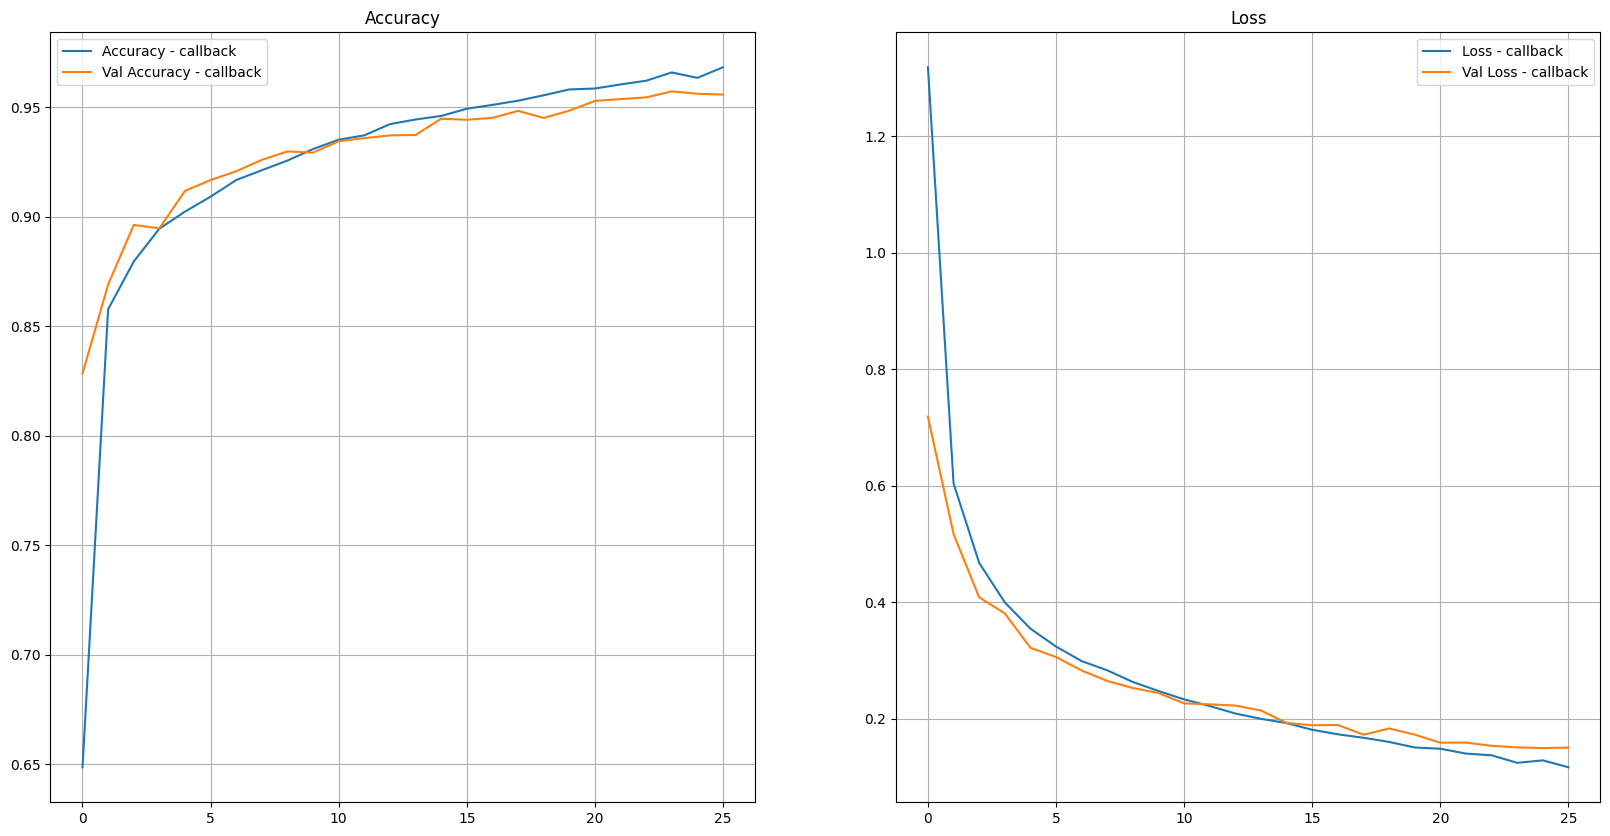

In [27]:
model = Chapter_01.get_function_model(with_compile=True)
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    epochs=50,
    batch_size=5000,
    callbacks=[callbacks],
    verbose=False,
)
Chapter_01.evaluate(x=x_test, y=y_test, model=model, silent=True)
Chapter_01.predict(x=x_test, y=y_test, model=model, silent=True)
Common.plot(data=[history], labels=["callback"])

### <ins />**4. Custom Callbacks**

**Callback Events**

| Event | Output |
| --- | ---|
| on_batch_start |  batch, logs |
| on_batch_end |  batch, logs |
| on_epoch_start |  epoch, logs |
| on_epoch_end |  epoch, logs |
| on_train_start | logs |
| on_train_end | logs |  
   

In [28]:
class CustomCallback(keras.callbacks.Callback):
    def on_batch_begin(self, batch, logs):
        print("Batch {} begins".format(batch + 1))

    def on_batch_end(self, batch, logs):
        print("Batch {} ends".format(batch + 1))

    def on_epoch_begin(self, epoch, logs):
        print("Epoch {} begins".format(epoch + 1))

    def on_epoch_end(self, epoch, logs):
        print("Epoch {} ends".format(epoch + 1))

    def on_train_begin(self, logs):
        print("Train begins")

    def on_train_end(self, logs):
        print("Train ends")


callbacks = CustomCallback()

In [29]:
model = Chapter_01.get_function_model()
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    epochs=2,
    batch_size=12000,
    callbacks=[callbacks],
    verbose=False,
)

Train begins
Epoch 1 begins
Batch 1 begins
Batch 1 ends
Batch 2 begins
Batch 2 ends
Batch 3 begins
Batch 3 ends
Batch 4 begins
Batch 4 ends
Epoch 1 ends
Epoch 2 begins
Batch 1 begins
Batch 1 ends
Batch 2 begins
Batch 2 ends
Batch 3 begins
Batch 3 ends
Batch 4 begins
Batch 4 ends
Epoch 2 ends
Train ends


### <ins />**5. Save and Load Model**

In [30]:
filepath = "../resources/models/tmp/model.keras"
model.save(filepath)
keras.models.load_model(filepath)

### <ins />**6. TensorBoard**

In [31]:
# ------------------------------
# Callback Tensorboard
# ------------------------------
model = Chapter_01.get_function_model()
Chapter_01.train(
    x=x_train,
    y=y_train,
    model=model,
    epoch=10,
    batch_size=12000,
    callbacks=[keras.callbacks.TensorBoard(log_dir="../resources/logs")],
)
# ------------------------------
# Run Tensorboard (Terminal)
# ------------------------------
# conda activate env
# tensorboard --logdir resources/logs

### <ins />**7. Training vs Inference**

##### **Trainable weight**
- These weights are meant to be updated via backpropagation
- E.g. kernels and biases

##### **Non-Trainable weight**
- These weights are meant to be updated via forwardpropagation
- E.g. custom RootMeanSquared metric
- E.g. builtin BatchNormalization layer

### <ins />**8. Low-level Metrics**

1. metric.update_state
2. metric.result
3. metric.reset_state

##### **SparseCategoricalAccuracy**

In [32]:
metric = keras.metrics.SparseCategoricalAccuracy()
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
targets = [0, 1, 2]
targets_onehot = tf.one_hot(targets, depth=tf.shape(predictions)[1])
metric.update_state(targets, predictions)
result = metric.result()
metric.reset_state()
print(targets_onehot)
print(result)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


##### **Mean**

In [33]:
mean = keras.metrics.Mean()
values = [1, 5, 13]
mean.update_state(values)
result = mean.result()
mean.reset_state()
print(result)

tf.Tensor(6.3333335, shape=(), dtype=float32)


.

.

.

---
---
---

.

.

.

---
# **Builtin fit with custom train_step method**
---

### <ins />**1. Custom train_step**

- Model with custom train_step
- Loss, Metrics, Optimizer are provided by user using model.compile
- Custom Loss, Metrics, Optimizer can also be used inside train_step

In [34]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        # ---------------------------------
        # Forward Propagation
        # ---------------------------------
        with tf.GradientTape() as tape:
            # self is used as model itself is a class
            predictions = self(inputs, training=True)
            losses = self.compiled_loss(targets, predictions)
        # ---------------------------------
        # Backward Propagation
        # ---------------------------------
        gradients = tape.gradient(losses, model.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        # ---------------------------------
        # Update Metrics
        # ---------------------------------
        self.compiled_metrics.update_state(targets, predictions)
        return {metric.name: metric.result() for metric in self.metrics}

### <ins />**2. Model**

In [35]:
L_inputs = keras.layers.Input(shape=(28 * 28,), name="Input")
L_features = keras.layers.Dense(units=512, activation=tf.nn.relu, name="Dense_Feature")(L_inputs)
L_features = keras.layers.Dropout(rate=0.01, name="Dropout_Feature")(L_features)
L_outputs = keras.layers.Dense(units=10, activation=tf.nn.softmax, name="Output")(L_features)
model = CustomModel(inputs=L_inputs, outputs=L_outputs)

### <ins />**3. Training**

In [36]:
(x_train, y_train), (x_test, y_test) = Chapter_01.prepare()
model.compile(
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
)
history = model.fit(x=x_train, y=y_train, epochs=2)
print(history.history)

Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2056 - sparse_categorical_accuracy: 0.9392
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9744
{'loss': [0.20561139285564423, 0.0859295129776001], 'sparse_categorical_accuracy': [0.939216673374176, 0.9744499921798706]}


---
# **Custom fit, evaluate, predict methods**
---

model.fit method works only with supervised learning

### <ins />**1. Tensorflow function decorator**

| Change | Effect |
| --- | --- |
| Without tf.function | Eager execution. Slow |
| With tf.function | Graph execution. Fast |
| Note | During debugging, use without tf.function |


### <ins />**2. Dataset**

In [37]:
(x_train, y_train), (x_test, y_test) = Chapter_01.prepare()
train_dataset = tf.data.Dataset.from_tensor_slices(tensors=(x_train, y_train)).batch(batch_size=128)
epochs = 3

### <ins />**3. Model**

In [38]:
L_inputs = keras.layers.Input(shape=(28 * 28,), name="Input")
L_features = keras.layers.Dense(units=512, activation=tf.nn.relu, name="Dense_Feature")(L_inputs)
L_features = keras.layers.Dropout(rate=0.01, name="Dropout_Feature")(L_features)
L_outputs = keras.layers.Dense(units=10, activation=tf.nn.softmax, name="Output")(L_features)
model = keras.Model(inputs=L_inputs, outputs=L_outputs)

### <ins />**4. Loss, Metrics, Optimizer**

In [39]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
optimizer = keras.optimizers.RMSprop()
mean_metric = keras.metrics.Mean()

### <ins />**5. Custom train step**

In [40]:
@tf.function
def train_step(inputs, targets):
    # ---------------------------------
    # Forward Propagation
    # ---------------------------------
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        losses = loss_fn(targets, predictions)
    # ---------------------------------
    # Backward Propagation
    # ---------------------------------
    gradients = tape.gradient(losses, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    # ---------------------------------
    # Update Metrics
    # ---------------------------------
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    mean_metric.update_state(losses)
    logs["loss"] = mean_metric.result()
    # ---------------------------------
    # Update Logs
    # ---------------------------------
    return logs


def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    mean_metric.reset_state()

### <ins />**6. Custom fit**

In [41]:
@Common.timer
def fit():
    for epoch in range(epochs):
        reset_metrics()
        for x_train, y_train in train_dataset:
            logs = train_step(x_train, y_train)
        print("Epoch: {}".format(epoch))
        for key, value in logs.items():
            print("Log[{}]: {}".format(key, value))


fit()

Epoch: 0
Log[sparse_categorical_accuracy]: 0.9231166839599609
Log[loss]: 0.26712968945503235
Epoch: 1
Log[sparse_categorical_accuracy]: 0.9674833416938782
Log[loss]: 0.10939329862594604
Epoch: 2
Log[sparse_categorical_accuracy]: 0.9792666435241699
Log[loss]: 0.07094132900238037
fit: 3.5397795410ms


### <ins />**7. Custom test step**

In [42]:
@tf.function
def test_step(inputs, targets):
    # ---------------------------------
    # Forward Propagation
    # ---------------------------------
    predictions = model(inputs, training=False)
    losses = loss_fn(targets, predictions)
    # ---------------------------------
    # Update Metrics
    # ---------------------------------
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    mean_metric.update_state(losses)
    logs["val_loss"] = mean_metric.result()
    return logs

### <ins />**8. Custom evaluate**

In [43]:
@Common.timer
def evaluate():
    test_dataset = tf.data.Dataset.from_tensor_slices(tensors=(x_test, y_test)).batch(batch_size=5000)
    reset_metrics()
    for x, y in test_dataset:
        logs = test_step(x, y)
        for key, value in logs.items():
            print("{}: {}".format(key, value))


evaluate()

val_sparse_categorical_accuracy: 0.9649999737739563
val_loss: 0.11820241808891296
val_sparse_categorical_accuracy: 0.9750000238418579
val_loss: 0.08218526840209961
evaluate: 0.0812942500ms


---
---
---